In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ejercicio 1.9 Guia 1 Obligatorio
Todo el 1, 2 y el 4 para entregar 



## Ejercicio 1. 
El objetivo de este ejercicio es actualizar nuestras creencias sobre los modelos causales
alternativos luego de observar un conjunto datos, P (Modelo|Datos).

Tengo r que es en que caja esta el premio, s es la caja que el presentador señala y c la caja que yo habia elegido.



### 1.1  Definir la distribucion de creencia conjunta como producto de las distribuciones condicionales del modelo


In [2]:
#Primero defino probabilidades de los parametros, segun cada modelo

def pr(r): #igual en ambos
    return 1/3

def pc(c): #igual en ambos
    return 1/3

def ps_rM0(s,r): #modelo base
    return (r!=s) * 1/2

def ps_rcM1(s,r,c): #modelo Monty Hall
    if r!=c:
        return (s!=r) * (s!=c) * 1
    else:
        return (s!=r)*1/2

In [3]:
#Definimos una matriz con las probabilidades de cada modelo
prcs_M = np.array([np.zeros((3,3,3)),np.zeros((3,3,3))])
h = np.arange(3)

for r in h:
    for c in h:
        for s in h:
            prcs_M[0,r,c,s] = pr(r) * pc(c) * ps_rM0(s,r)
            prcs_M[1,r,c,s] = pr(r) * pc(c) * ps_rcM1(s,r,c)

### 1.2 Mostrar que el producto de las predicciones a priori de la secuencia de datos de un episodio es igual a la probabilidad conjunta a priori

Es decir, que prod P(c,s,r|M_i) = P(r,c,s | M_i)
P(c,s,r|M_i) = P(c|M_i) * P(s|c,M_i) * P(r|s,c,M_i) 
Primero elijo una caja, despues me dan la pista y despues veo donde esta el regalo.


In [16]:
def pc_M(c,m): #Probabilidad Total de c dado el modelo m
    #P(c|M) = sum_s( sum_r (P(c |r,s,M))       ) 
    return np.sum(prcs_M[m,:,c,:])

def ps_cM(s,c,m): #Probabilidad Total de s dado c y m
    #P(s|c,M) = P(s,c|M) / p(c|M)
    #P(s,c|M) = sum_r ( P(s,c|r,M))
    return np.sum(prcs_M[m,:,c,s]) / pc_M(c,m)

def pr_scM(r,s,c,m): # Probabilidad de r_i dado s,c y m
    #P(r|s,c,M) = P(r,c,s|M)/P(c,s|M)
    return prcs_M[m,r,c,s]/np.sum(prcs_M[m,:,c,s])

In [17]:
def pEpisodio(c,s,r,m):
    #P(r,c,s|M) = p(c|M) * p(s|c,M) * p(r|s,c,M)
    if m==0:
        return pr(r) * pc(c) * ps_rM0(s,r)
    else:
        return pr(r) * pc(c) * ps_rcM1(s,r,c)
    #return pc_M(c,m) * ps_cM(s,c,m) * pr_scM(r,s,c,m)

print("Episodio m r c s | Son iguales?")
for m in range(2):
    for r in range(3):
        for c in range(3):
            for s in range(3):
                print(f"Episodio {m} {r} {c} {s} | {pEpisodio(c,s,r,m)==prcs_M[m,r,c,s]}")

Episodio m r c s | Son iguales?
Episodio 0 0 0 0 | True
Episodio 0 0 0 1 | True
Episodio 0 0 0 2 | True
Episodio 0 0 1 0 | True
Episodio 0 0 1 1 | True
Episodio 0 0 1 2 | True
Episodio 0 0 2 0 | True
Episodio 0 0 2 1 | True
Episodio 0 0 2 2 | True
Episodio 0 1 0 0 | True
Episodio 0 1 0 1 | True
Episodio 0 1 0 2 | True
Episodio 0 1 1 0 | True
Episodio 0 1 1 1 | True
Episodio 0 1 1 2 | True
Episodio 0 1 2 0 | True
Episodio 0 1 2 1 | True
Episodio 0 1 2 2 | True
Episodio 0 2 0 0 | True
Episodio 0 2 0 1 | True
Episodio 0 2 0 2 | True
Episodio 0 2 1 0 | True
Episodio 0 2 1 1 | True
Episodio 0 2 1 2 | True
Episodio 0 2 2 0 | True
Episodio 0 2 2 1 | True
Episodio 0 2 2 2 | True
Episodio 1 0 0 0 | True
Episodio 1 0 0 1 | True
Episodio 1 0 0 2 | True
Episodio 1 0 1 0 | True
Episodio 1 0 1 1 | True
Episodio 1 0 1 2 | True
Episodio 1 0 2 0 | True
Episodio 1 0 2 1 | True
Episodio 1 0 2 2 | True
Episodio 1 1 0 0 | True
Episodio 1 1 0 1 | True
Episodio 1 1 0 2 | True
Episodio 1 1 1 0 | True
Episodio

Efectivamente hacer la probabilidad a priori de la secuencia (pEpisodio) es lo mismo que hacer la conjunta a priori (prcs_M)

### 1.3. Simular datos con el modelo Monty Hall

In [18]:
def simularMontyHall(n_episodios,seed=0):
    np.random.seed(seed)
    datos = []
    h = np.arange(3)
    p_r = [pr(hr) for hr in h]
    p_c = [pc(hc) for hc in h]
    for t in range(n_episodios):
        r_ = np.random.choice(3,p=p_r)
        c_ = np.random.choice(3,p=p_c)
        p_s = [ps_rcM1(hs,r_,c_) for hs in h]
        s_ = np.random.choice(3,p=p_s)
        datos.append((c_,s_,r_))
    return datos

In [19]:
simulaciones = simularMontyHall(16)

### 1.4. Calcular la prediccion a priori que hace cada uno de los modelos sobre la totalidad de la base de datos simulada

In [23]:
predicciones = [[1],[1]]

for (c,s,r) in simulaciones:
    for m in range(2):
        predicciones[m].append(pEpisodio(c,s,r,m))

pDatos_M0, pDatos_M1 = np.prod(predicciones,axis=1) #Probabilidad del conjunto de episodios segun cada modelo
pDatos_M0,pDatos_M1

(np.float64(8.234550899283273e-21), np.float64(3.372872048346429e-17))

ambas son muy cercanas a 0, pero el modelo base da e^-21 y el modelo Monty Hall da e^-17

In [22]:
predDatos_M0 = predicciones[0] #probabilidad de cada episodio para cada modelo!!
predDatos_M1 = predicciones[1]

### 1.5. Expresar intuitivamente la diferencia de desempeno predictivo de los modelos

Una idea puede ser expresarlo como logaritmos!! 
Bayes Factor: log(P_m1/P_m0)

Como la diferencia es en ordenes de magnitud, medimos eso

In [25]:
#Con profe
log_evidencia_M0 = np.log10(pDatos_M0)
log_evidencia_M1 = np.log10(pDatos_M1)
#Diferencia de ordenes de magnitud
dif = log_evidencia_M1 - log_evidencia_M0
#cantidad de creencia que preserva M1 sobre M0, 10**dif porque es el factor de bayes posta, sin el log
10**(dif)

np.float64(4095.999999999973)

In [11]:
# def bayes_factor():
#     return math.log10(p_m1/p_m0)
# bayes_factor()

Otra idea es la Media Geometrica / Prediccion Tipica.

P(datos|M) = p(d1|M) p(d2|d1,M) = prod [p(d1|M)P(d2|M)]^1/N

Lo hacemos con logaritmo

In [12]:
#Media Geometrica
media_geom_M1 = 10**(log_evidencia_M1/(len(simulaciones)*3))
media_geom_M0 = 10**(log_evidencia_M0/(len(simulaciones)*3))
print(media_geom_M1,media_geom_M0)

0.4537674406297909 0.38157141418444396


In [13]:
# o capaz asi, mejor asi. 
log_p_datos_M0 = np.log10(predDatos_M0)
prediccion_tipica_datos_M0= 10**(np.sum(log_p_datos_M0)/(len(simulaciones)*3))
pred_conjunta_datos_M0 = prediccion_tipica_datos_M0**(len(simulaciones)*3)

log_p_datos_M1 = np.log10(predDatos_M1)
prediccion_tipica_datos_M1= 10**(np.sum(log_p_datos_M1)/(len(simulaciones)*3))
pred_conjunta_datos_M1 = prediccion_tipica_datos_M1**(len(simulaciones)*3)

pred_conjunta_datos_M0,pred_conjunta_datos_M1

(np.float64(8.234550899283281e-21), np.float64(3.372872048346434e-17))

### 1.6. Calcular la prediccion de los datos con la contribucion de todos los modelos.

In [27]:
def pM(m):
    return 1/2

pDatosM = [np.cumprod(predDatos_M0) * pM(0) , np.cumprod(predDatos_M1) * pM(1)]
pDatos = pDatosM[0] + pDatosM[1]

usamos cumprod porque P(datos|modelo) = P(d1|M) * P(d2|d1,M) ?

### 1.7. Calcular el posterior de los modelos a medida que vamos agregando datos


In [28]:
pM_Datos = pDatosM/pDatos
pM_Datos

array([[5.00000000e-01, 3.33333333e-01, 3.33333333e-01, 2.00000000e-01,
        1.11111111e-01, 5.88235294e-02, 5.88235294e-02, 5.88235294e-02,
        3.03030303e-02, 1.53846154e-02, 7.75193798e-03, 3.89105058e-03,
        1.94931774e-03, 1.94931774e-03, 9.75609756e-04, 4.88042948e-04,
        2.44081035e-04],
       [5.00000000e-01, 6.66666667e-01, 6.66666667e-01, 8.00000000e-01,
        8.88888889e-01, 9.41176471e-01, 9.41176471e-01, 9.41176471e-01,
        9.69696970e-01, 9.84615385e-01, 9.92248062e-01, 9.96108949e-01,
        9.98050682e-01, 9.98050682e-01, 9.99024390e-01, 9.99511957e-01,
        9.99755919e-01]])

### 1.8. Graficar el valor del posterior a medida que se observan nuevos
episodios

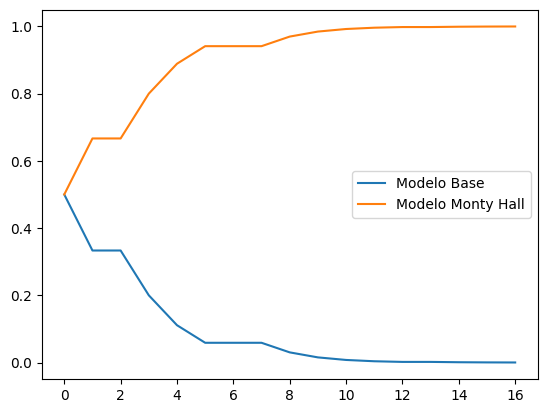

In [29]:
plt.plot(pM_Datos[0])
plt.plot(pM_Datos[1])
plt.legend(["Modelo Base", "Modelo Monty Hall"])

### 1.9. Leer los datos NoMontyHall.csv, proponer un modelo alternativo
superior a Monty Hall y el modelo Base, y evaluarlo en funci´on del
desempe˜no predictivo.



In [35]:
datosNoMonty = pd.read_csv("Materiales1/datos/NoMontyHall.csv")

P(r, c, s, a, p|M2) = P(r)P(c)P(s|r, M0)^(1−a) P(s|r, c, M1)^(a) P(a|p)P(p)

Crear un modelo alternativo que tenga un desempeno similar al modelo Monty Hall. 
Calcular la secuencia de predicciones de los tres modelos en esta nueva base de datos (Modelo Base, Monty Hall y Alternativo). 
Calcular la diferencia de desempeno predictivo en  ́orden de magnitud entre los modelos. 
Calcular la media geometrica de las predicciones de los diferentes modelos. 
Graficar el posterior de los tres modelos en los primeros 60 episodios.

In [31]:
import random
import numpy as np

In [32]:
n_p = 1000 # tamanio de grilla de posibles P(p)


def pp_M2(p): # a priori todas las p son equiprobables
    return 1/n_p

def pa_pM2(a,p): # Probabilidad de a
    if a ==1:
        return p
    else:
        return 1-p

def prcsap_M2(s,r,c,a,p):
    return pr(r)*pc(c)*ps_rM0(s,r)**(1-a) * ps_rcM1(s,r,c)**a *pa_pM2(a,p) * pp_M2(p)



In [33]:
#Predicciones
def pEpisodio_mas_modelos(c,s,r,m):
    #P(r,c,s|M) = p(c|M) * p(s|c,M) * p(r|s,c,M)
    if m==0:
        return pr(r) * pc(c) * ps_rM0(s,r)
    elif m == 1:
        return pr(r) * pc(c) * ps_rcM1(s,r,c)
    else:
        return sum([prcsap_M2(s,r,c,a,p) for a in [0,1] for p in np.linspace(0,1,n_p)]) #devuelvo sum porque estoy "integrando" por a y p.
        

In [36]:
predicciones = [[1],[1],[1]]

for (c,s,r) in datosNoMonty.values:
    for m in range(3):
        predicciones[m].append(pEpisodio_mas_modelos(c,s,r,m))

pDatos_M = [np.cumprod(predicciones[0]) * 1/3 , np.cumprod(predicciones[1]) * 1/3, np.cumprod(predicciones[2]) * 1/3]
pDatos = pDatos_M[0] + pDatos_M[1] + pDatos_M[2] #P(datos)

pM_Datos = pDatos_M/pDatos # Posterior

C:\Users\admin\AppData\Local\Temp\ipykernel_5024\3185747508.py:10: RuntimeWarning: invalid value encountered in divide
  pM_Datos = pDatos_M/pDatos # Posterior


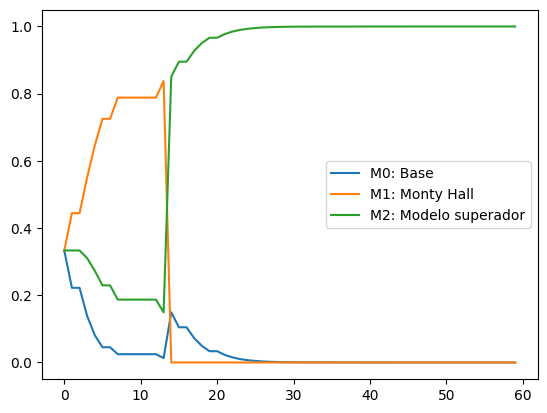

In [37]:
space = 60
plt.plot(pM_Datos[0][0:space])
plt.plot(pM_Datos[1][0:space])
plt.plot(pM_Datos[2][0:space])
plt.legend(["M0: Base","M1: Monty Hall", "M2: Modelo superador"])

## Ejercicio 2


### 2.1. Generar datos con el modelo AcausaB

In [38]:
pA_MAB = np.array([0.5,0.5])
pAB_MAB = np.array([[0.95,0.05],[0.05,0.95]]) #A,B

pB_MBA = np.array([0.5,0.5])
pBA_MBA = np.array([[0.95,0.05],[0.05,0.95]]) #B,A

def gen_datos_AcausaB(n=16,seed=0):
    np.random.seed(seed)
    datos = []
    for i in range(n):
        a = np.random.choice([0,1],p=pA_MAB)
        b = np.random.choice([0,1],p=pAB_MAB[a])
        datos.append((a,b))
    return datos

datosAcausaB = gen_datos_AcausaB()



In [26]:
datosAcausaB

[(np.int64(1), np.int64(1)),
 (np.int64(1), np.int64(1)),
 (np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(1), np.int64(1)),
 (np.int64(1), np.int64(1)),
 (np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(1), np.int64(1)),
 (np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(0)),
 (np.int64(0), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(0), np.int64(0))]

### 2.2. Evaluar el desempeno predictivo de los modelos causales alterna-
tivos sobre los datos sint ́eticos generados en el punto anterior



Es decir, quiero p(Datos|Modelo) = prod p(a_i,b_i | Modelo)

Pero p(a_i,b_i | Modelo) depende del modelo:

- p(a_i,b_i | mAB) = p(b_i | a_i) * p(a_i|mAB)
- p(a_i,b_i | mA) = p(a_i | b_i) * p(b_i|mBA)

Una vez tengo p(Datos|Modelo) puedo compararlos

In [39]:


def pB_A_MAB(A,B): #posterior modelo AB
    return pAB_MAB[A,B] * pA_MAB[A]

def pA_B_MBA(A,B): #posterior modelo BA
    return pBA_MBA[B,A] * pB_MBA[B]

def pred_AB_M(A,B,m): #m=0 es AB, m=1 es BA
    if m==0:
        return pB_A_MAB(A,B)
    else:
        return pA_B_MBA(A,B)

predicciones_modelos_AB_BA=[[],[]]
for (a,b) in datosAcausaB:
    for m in range(2):
        predicciones_modelos_AB_BA[m].append(pred_AB_M(a,b,m))
predicciones_modelos_AB_BA

[[np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475)],
 [np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475),
  np.float64(0.475)]]

In [40]:
pDatosAB_MAB = np.prod(predicciones_modelos_AB_BA[0])
pDatosAB_MBA = np.prod(predicciones_modelos_AB_BA[1])
pDatosAB_MAB,pDatosAB_MBA

(np.float64(6.715799997738117e-06), np.float64(6.715799997738117e-06))

Ambos modelos tienen igual desempeño!!!

### 2.3. Actualizar la creencia respecto de los modelos causales alternativos luego de ver los datos.

In [41]:
pDatos_AcausaB_Modelos = [np.cumprod(predicciones_modelos_AB_BA[0] )* 1/2,np.cumprod(predicciones_modelos_AB_BA[1] )* 1/2]
pDatos_AcausaB = pDatos_AcausaB_Modelos[0] + pDatos_AcausaB_Modelos[1]
pModelos_DatosAcausaB = pDatos_AcausaB_Modelos/pDatos_AcausaB
pModelos_DatosAcausaB

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5]])

### 2.4 Conclusiones


Son exactamente iguales!!!
En los datos originales siempre caen en 1,1 o 0,0, quizas ahi esta el problema!!

NOTAS clase 2/9
Efectivamente debia dar asi. Esto es porque....... es la misma distribucion conjunta!!! La posterior es igual!!!
No puedo comparar modelos solo con datos cuando las posteriors son iguales!!!!

## 3. Modelos polinomiales de complejidad creciente.

In [1]:
import Materiales1.ModeloLineal as modeloLineal
import statsmodels.regression.linear_model as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc


### 3.1. Generar 20 datos alrededor de una per´ıodo de una sinoidal

In [2]:
x_datos = sc.stats.uniform.rvs(-0.5,1,20)
y_datos = np.sin(2*np.pi*x_datos) + sc.stats.norm.rvs(0,0.1,len(x_datos))

In [3]:
x_tot=np.linspace(-0.5,0.5,100)
y_tot=np.sin(2*np.pi*x_tot)

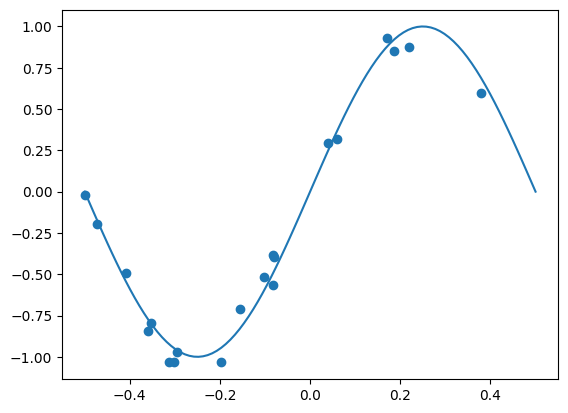

In [21]:
plt.scatter(x_datos,y_datos)
plt.plot(x_tot,y_tot)

### 3.2. Graficar el valor de m´axima verosimilitud obtenido por los modelos polinomiales de grado 0 a 9


<BarContainer object of 10 artists>

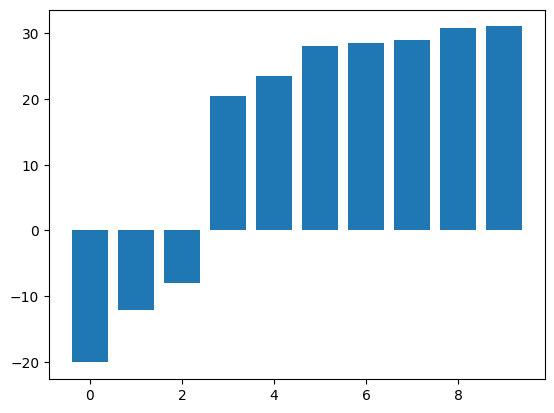

In [20]:
x_predicciones = [[[x ** i for i in range(grado+1)] for x in x_datos]  for grado in range(10)]
models = [st.OLS(y_datos,x_predicciones[grado]) for grado in range(10)]
params = [model.fit() for model in models]
likelihoods = [models[i].loglike(params[i].params) for i in range(10)]
plt.bar(range(10),likelihoods)
    # models[grado] = st.OLS(y_datos,x_predicciones[grado])
    # params = models[grado].fit()
    # plt.plot(models[grado].loglike(params))

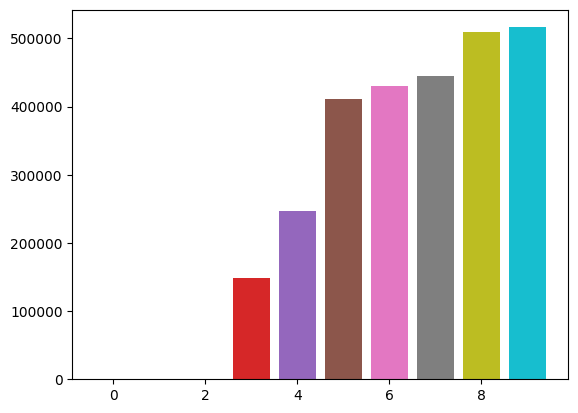

In [22]:
for i in range(10):
    plt.bar(i,modeloLineal.likelihood(np.array(params[i].params),y_datos,x_predicciones[i]))

### 3.3. Graficar las curvas obtenidas con cada modelo mediante maxima verosimilitud.

In [112]:
models[2].predict(params[2].params,x_predicciones[2])

array([ 0.40891988,  0.4784044 ,  0.48555983, -0.89592356, -0.35633192,
        0.26815806,  0.48965907,  0.48990946,  0.19617463,  0.48088445,
        0.29498872, -0.05443573,  0.09907936,  0.25403462,  0.18702212,
        0.48398835,  0.48183378, -0.04605028,  0.49248261, -0.49114529])

(-1.0, 1.0)

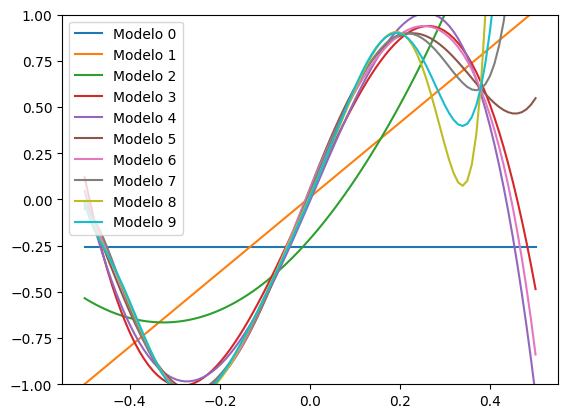

In [24]:

x_tot_transform = [[[x ** i for i in range(grado+1)] for x in x_tot]  for grado in range(10)]
predicciones= [models[i].predict(params[i].params,x_tot_transform[i]) for i in range(10)]
for i in range(10):
    plt.plot(x_tot,predicciones[i])
plt.legend([f"Modelo {i}" for i in range(10)])
plt.ylim(-1,1)

(-1.0, 1.0)

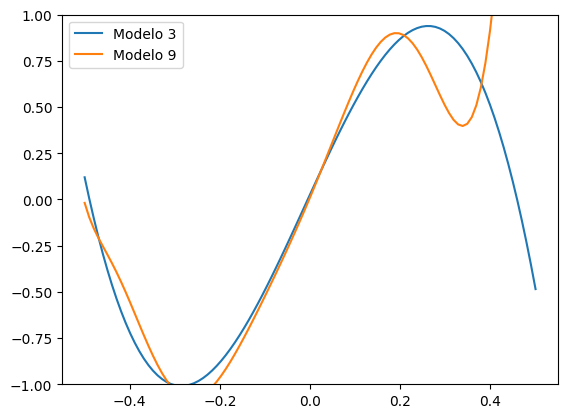

In [25]:
comparar = [3,9]
for i in comparar:
    plt.plot(x_tot,predicciones[i])
plt.legend([f"Modelo {i}" for i in comparar])
plt.ylim(-1,1)

### 3.4. Evaluaci ́on de la predicci ́on “en l ́ınea” que hacen los modelos ajus-tados por m ́axima verosimilitud.

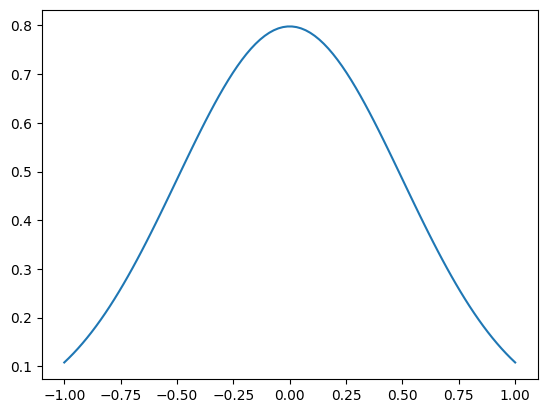

In [141]:
beta_grid = np.linspace(-1,1,100)
beta_dist = sc.stats.norm.pdf(beta_grid,0,0.5)
plt.plot(beta_grid,beta_dist)

Muchas simplificaciones!!!!
prediccion = p(y|datos,beta) que es una normal.
beta desconocido pero usa el mismo con el que creo los datos.

Basicamente, ajusto/entreno c dos datos, genero "predicciones". Esas "predicciones" voy a ir haciendo el producto. Despues entreno con 3 datos, genero "prediccion" del 4to. Y asi.

Puedo hacer lo siguiente:
- Genero predict de 2 datos.
- Lo uso de media para una pdf y evaluo el valor posta. Ademas, integro eso por la distribucion de mi beta.
sum pdf(y,y_predict,beta) * distrib_beta(beta) / len(beta_grid)
Esa va a ser mi prediccion de y? Probar vs pdf(y,y_predict,beta) con beta real (0.2?)

In [27]:
producto_predicciones_parciales = []

for i in range(10):
    prods_predicts = 1
    modelo = st.OLS(y_datos[:2],x_predicciones[i][:2])
    params = modelo.fit().params
    prods_predicts *= sc.stats.norm.pdf(y_datos[2],modelo.predict(params,x_predicciones[i][2]),0.5) #modelo.predict(params,x_predicciones[i][2])
    for j,x in enumerate(x_predicciones[i][3:]):
        modelo = st.OLS(y_datos[:j+3],x_predicciones[i][:j+3])
        params = modelo.fit().params
        prods_predicts *= sc.stats.norm.pdf(y_datos[j+3],modelo.predict(params,x_predicciones[i][j+3]),0.5)
    producto_predicciones_parciales.append(prods_predicts)

<BarContainer object of 10 artists>

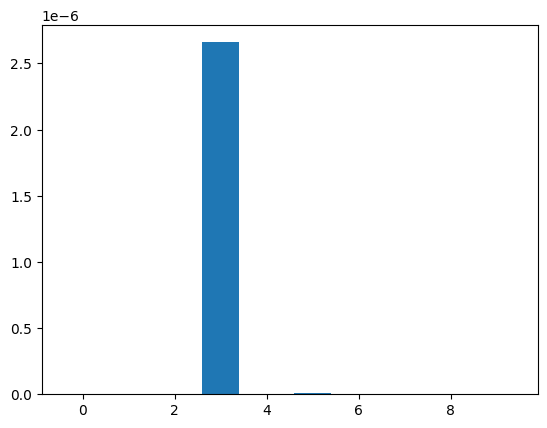

In [28]:
plt.bar(range(10),producto_predicciones_parciales)

## Ejercicio 4

### 4.1. Abrir el archivo alturas.csv y visualizar los datos


In [120]:
import statsmodels.regression.linear_model as st
import statsmodels.api as stapi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from Materiales1 import ModeloLineal

In [71]:
datos_sexo = pd.read_csv("Materiales1/datos/alturas.csv")

In [47]:
cats = pd.Categorical(datos_sexo["sexo"])
cats.codes

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1], dtype=int8)

In [53]:
grouped = datos_sexo.groupby("sexo")

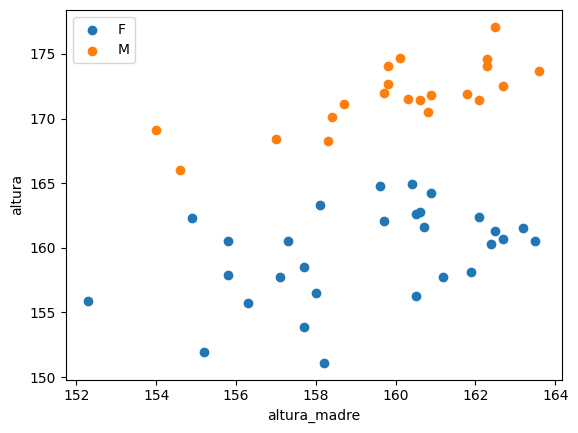

In [68]:

for group in grouped.groups:
    data = grouped.get_group(group)
    plt.scatter(data["altura_madre"],data["altura"],label=group)
    plt.xlabel("altura_madre")
    plt.ylabel("altura")
plt.legend()

### 4.2. Definir 3 modelos causales alternativos

#### Modelo Base
altura = h0 + h1 * altura_madre

In [78]:
altura_madre = stapi.add_constant(datos_sexo["altura_madre"])

modelo_base = st.OLS(datos_sexo["altura"],altura_madre,hasconst=True).fit()
modelo_base.params

const           13.411457
altura_madre     0.948205
dtype: float64

O sea tenemos
$$\text{altura} = 0.948205 * \text{altura-madre} + 13.411457 $$

#### Modelo Biologico
altura = h0 + h1 · altura madre + h2 · I(sexo = F)

In [79]:
cats.codes #Es 1 si es Masculino, 0 si es femenino

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1], dtype=int8)

In [116]:
altura_madre_modelo2 = np.array([datos_sexo["altura_madre"],cats.codes,[ 1 for i in cats.codes]]).T
modelo_biologico = st.OLS(datos_sexo["altura"],altura_madre_modelo2,hasconst=True).fit()
modelo_biologico.params

x1        0.631632
x2       11.678611
const    59.013200
dtype: float64

O sea tenemos
$$\text{altura} = 0.631632 * \text{altura-madre} + 11.678611 * I(\text{sexo = M})  +59.013200 $$

#### Modelo azar
altura = h0 · altura madre + h1+(ID mod (max(ID)/2))

In [96]:
grupos =  np.mod(datos_sexo["id"],max(datos_sexo["id"]//2))
grupos.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24,  0])

In [106]:
identidades = []
grupos_sorted = grupos.unique()
grupos_sorted.sort()
for grupo in grupos_sorted:
    values = grupos == grupo
    identidades.append(values)
np.array(identidades).T

array([[False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False]])

In [107]:
altura_madre_modelo3 = identidades.copy()
altura_madre_modelo3.insert(0,datos_sexo["altura_madre"])
altura_madre_modelo3 = np.array(altura_madre_modelo3).T

In [108]:

modelo_random = st.OLS(datos_sexo["altura"],altura_madre_modelo3).fit()
modelo_random.params

x1      1.009469
x2      9.188743
x3      1.394424
x4      2.327854
x5      2.141584
x6      7.281641
x7      3.806734
x8      4.194898
x9      2.682588
x10     2.521699
x11     3.575013
x12     2.691296
x13    -0.657469
x14     5.132115
x15     3.089690
x16     9.407022
x17     2.513650
x18     2.349159
x19    -0.767412
x20    -4.164571
x21    12.269517
x22    -2.045160
x23     3.334955
x24     5.161283
x25     1.993004
x26    11.510048
dtype: float64

### 4.3 Computar la evidencia de los modelos causales alternativos

In [147]:
# parametros_modelos = [np.array(modelo_base.params), np.array(modelo_biologico.params),np.array(modelo_random.params)]
phi = [altura_madre.to_numpy(),altura_madre_modelo2,altura_madre_modelo3]
likelihoods = [ModeloLineal.log_evidence(datos_sexo["altura"],fi) for fi in phi]

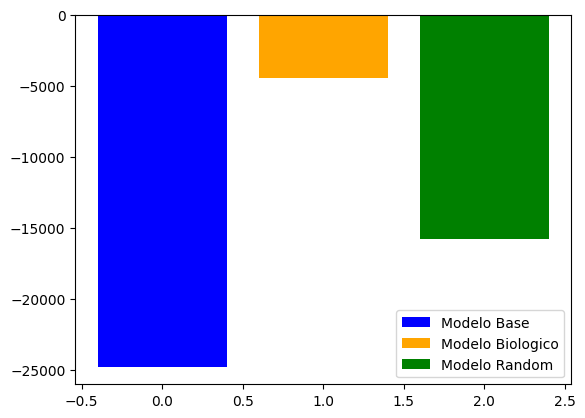

In [148]:
plt.bar([0,1,2],likelihoods,label=["Modelo Base","Modelo Biologico", "Modelo Random"],color=["b","orange","green"])
plt.legend()

### 4.4. Computar la media geom´etrica de los modelos causales alternativos

Entiendo que hay que hacer como en el 3.4

In [ ]:
producto_predicciones_parciales = []

for i in range(10):
    prods_predicts = 1
    modelo = st.OLS(y_datos[:2],x_predicciones[i][:2])
    params = modelo.fit().params
    prods_predicts *= sc.stats.norm.pdf(y_datos[2],modelo.predict(params,x_predicciones[i][2]),0.5) #modelo.predict(params,x_predicciones[i][2])
    for j,x in enumerate(x_predicciones[i][3:]):
        modelo = st.OLS(y_datos[:j+3],x_predicciones[i][:j+3])
        params = modelo.fit().params
        prods_predicts *= sc.stats.norm.pdf(y_datos[j+3],modelo.predict(params,x_predicciones[i][j+3]),0.5)
    producto_predicciones_parciales.append(prods_predicts)